<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import seaborn as sns

import matplotlib.image as mpimg
from skimage.io import imread, imshow

In [2]:
# Read dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Split into features and targets

y_train = df_train.label.values
y_test = df_test.label.values

X_train = df_train.drop("label",axis=1).values
X_test  = df_test.drop("label",axis=1).values


Separates the target variable label from the features.

Converts the data to numpy arrays for faster processing.



label of the digit:  5


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

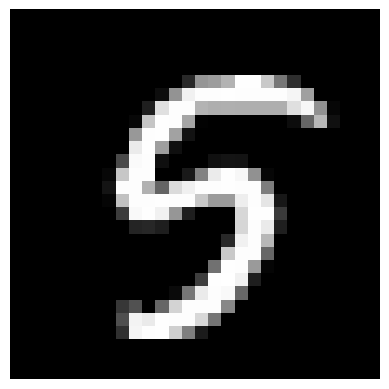

In [4]:
image_index = 8
print('label of the digit: ',y_train[image_index])
plt.imshow(X_train[image_index].reshape((28, 28)),cmap = 'gray')
plt.axis('off')


Displays the 8th digit from the training set.

Reshapes the 1D array to a 2D 28x28 image.

Removes the axis for a cleaner image disp

In [5]:
# Principle Component Analysis

number_of_components = 40

from sklearn.decomposition import PCA

#Train PCA on the training data
pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(X_train)

#Dimensionality reduction on both the training set and the test set
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

Creates a PCA model with 40 components.

Trains the model on the training data.

svd_solver='full' ensures the most accurate reconstruction.



Transforms the original 784-dimensional data to 40-dimensional PCA space.

Reduces the number of features while retaining the most variance.

<ipython-input-6-4d6928d34a53>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(PCA_components[i].reshape((28,28)),cmap='gray')
<ipython-input-6-4d6928d34a53>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(PCA_components[i].reshape((28,28)),cmap='gray')
<ipython-input-6-4d6928d34a53>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(PCA_components[i].reshape((28,28)),cmap='gray')
<ipython-input-6-4d6928d34a53>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(PCA_components[i].reshape((28,28)),cmap='gray')
<ipython-input-6

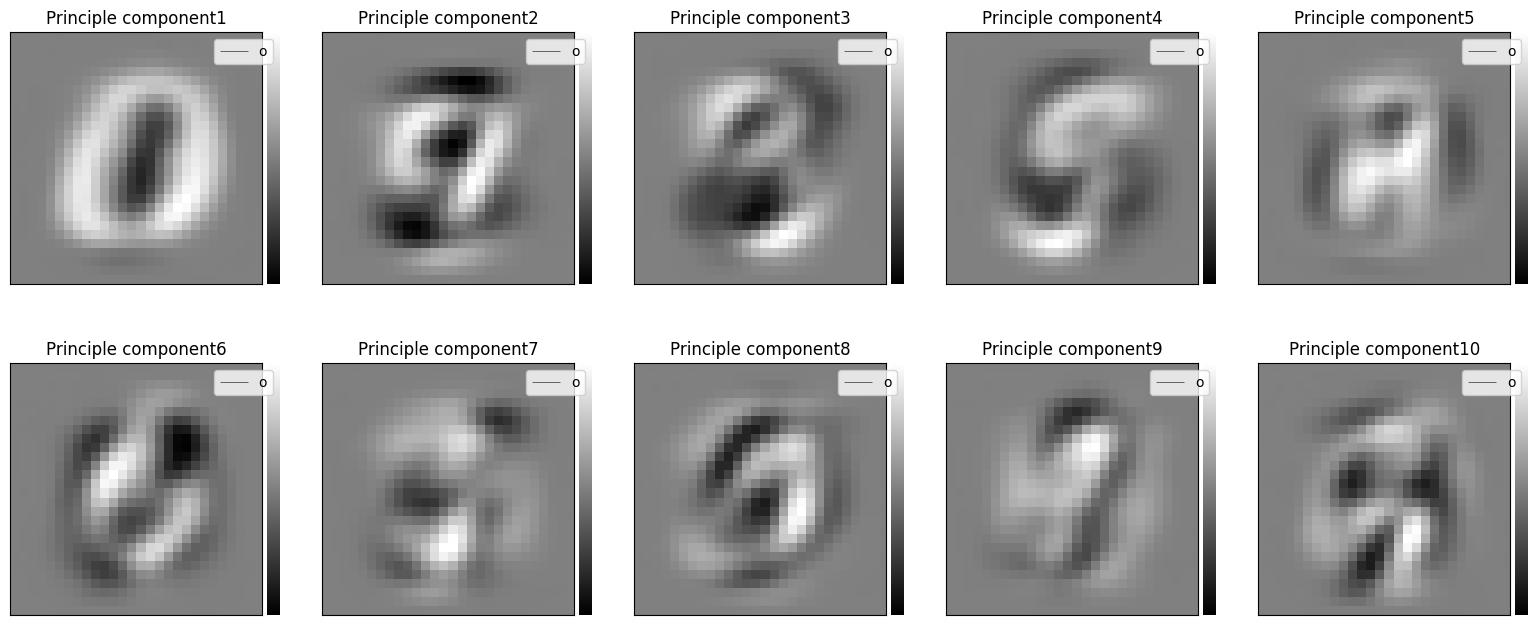

In [6]:
# Visualize the first 10 principle components

PCA_components = pca_model.components_

fig = plt.figure(figsize=(16, 9))
for i in range(0,10):
    ax = fig.add_subplot(2, 5, i+1)
    imshow(PCA_components[i].reshape((28,28)),cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.axis('off')
    plt.legend('off')

    ax.set_title('Principle component'+str(i+1))
    # x and y axis should be equal length
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
plt.show()


Visualizes the first 10 principal components as 28x28 images.

Each component captures a direction of maximum variance.

In [7]:
# PCA scores of the chosen digit

print(X_train_pca[image_index,:])

[ 354.77055124  143.18785282  381.81672672  620.98948171  310.27798688
  489.44089344 -533.56768182 -232.51585886 -366.40133669  -64.6972105
   35.69910938  134.18047953  102.48101831  586.58141887  221.9634094
  212.51414373 -131.20597816  166.19094881 -149.4476211   290.90395739
  -70.93182371  -27.67287027   72.74812974  -80.20823245  144.27449129
 -237.1693674    83.44465842  120.33772477   -0.92671744 -109.60021222
 -160.50045372 -101.39860199    7.92286194 -336.53555756  208.17877704
  164.90558562   98.66395481   60.81260535   23.4675592   -42.27910839]


Prints the PCA representation of the chosen digit.

Each score represents the contribution of each principal component.

In [8]:
# Explained variance for each principle component

print(pca_model.explained_variance_ratio_)

[0.09622774 0.07169274 0.06162532 0.05412628 0.04859137 0.04297465
 0.03292357 0.02892797 0.02755892 0.02348328 0.02107819 0.02052552
 0.01707707 0.01688598 0.01583215 0.01481815 0.01322416 0.0129219
 0.0118972  0.01157611 0.01076297 0.01013138 0.00966695 0.00918594
 0.00886457 0.00835795 0.00812716 0.00789175 0.0074726  0.00690113
 0.00658793 0.00645775 0.00606518 0.00595052 0.00560355 0.00542467
 0.00507373 0.0048704  0.00479924 0.0046529 ]


Prints the variance explained by each PCA component.

Helps evaluate how much information each component captures.

In [9]:
# The total explained variance

print(np.sum(pca_model.explained_variance_ratio_))

0.7868165365950708


Calculates the total variance explained by the chosen number of components (40).

Useful for understanding the effectiveness of the dimensionality reduction.



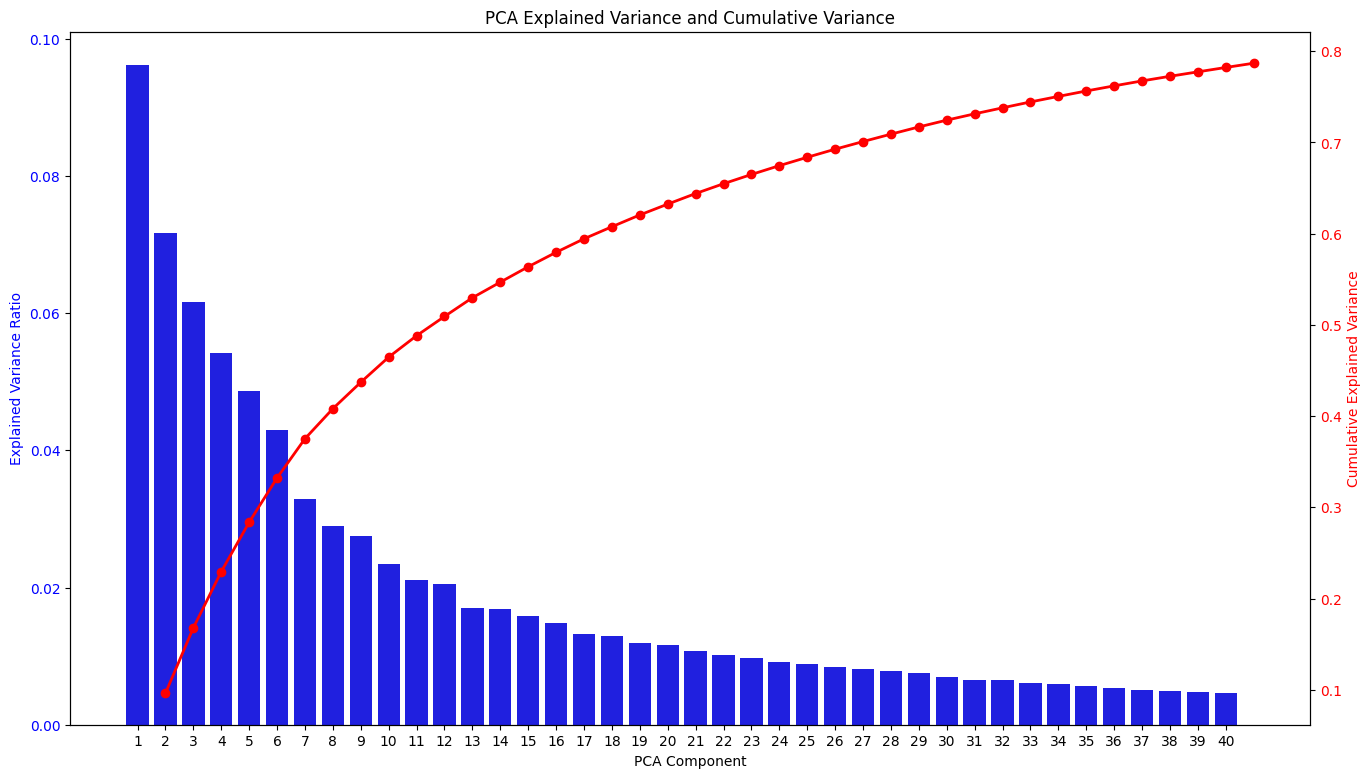

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming pca_model is already fitted
PCAnumber = np.arange(1, len(pca_model.explained_variance_ratio_) + 1)
PCA_explained_cumulative = np.cumsum(pca_model.explained_variance_ratio_)

fig, ax1 = plt.subplots(figsize=(16, 9))

# Bar plot for individual explained variance
sns.barplot(x=PCAnumber, y=pca_model.explained_variance_ratio_, color='blue', ax=ax1)
ax1.set_xlabel('PCA Component')
ax1.set_ylabel('Explained Variance Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for cumulative explained variance
ax2 = ax1.twinx()
ax2.plot(PCAnumber, PCA_explained_cumulative, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Explained Variance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("PCA Explained Variance and Cumulative Variance")
plt.show()


### **🟢 Beginner Explanation - Visualizing PCA Variance**

---

This code is used to **visualize** the **importance** of each **Principal Component (PCA)** in a **PCA model**. It shows both the **individual** variance **explained** by each component and the **cumulative** variance, helping you decide how many **components** to keep for your **dimensionality reduction**.

---

#### **🔷 Code Breakdown:**

1. **Import Required Libraries:**

```python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
```

* **`matplotlib.pyplot`** - Used for **creating** and **customizing** the plots.
* **`seaborn`** - Used for **better-looking** bar plots.
* **`numpy`** - Used for **numerical** operations.

---

2. **Calculate PCA Metrics:**

```python
PCAnumber = np.arange(1, len(pca_model.explained_variance_ratio_) + 1)
PCA_explained_cumulative = np.cumsum(pca_model.explained_variance_ratio_)
```

* **`pca_model.explained_variance_ratio_`** - Gives the **percentage** of variance **explained** by each **principal component**.
* **`np.cumsum()`** - Calculates the **cumulative** sum, which **adds** up the explained variance for each component.
* **`np.arange()`** - Creates a **list** of **component numbers** starting from **1**.

---

3. **Create the Figure and First Plot (Bar Plot):**

```python
fig, ax1 = plt.subplots(figsize=(16, 9))
```

* Creates a **figure** with a **specific** size.
* **`ax1`** is the **first** Y-axis for the **individual** explained variance.

---

4. **Plot Individual Explained Variance (Bars):**

```python
sns.barplot(x=PCAnumber, y=pca_model.explained_variance_ratio_, color='blue', ax=ax1)
ax1.set_xlabel('PCA Component')
ax1.set_ylabel('Explained Variance Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
```

* **`sns.barplot()`** - Draws the **blue** bars for **individual** variance.
* **`set_xlabel()`** and **`set_ylabel()`** - Add **labels** to the **X** and **Y** axes.
* **`tick_params()`** - Sets the **Y-axis** label **color** to **blue** for consistency.

---

5. **Add Second Y-Axis for Cumulative Variance (Line Plot):**

```python
ax2 = ax1.twinx()
ax2.plot(PCAnumber, PCA_explained_cumulative, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Explained Variance', color='red')
ax2.tick_params(axis='y', labelcolor='red')
```

* **`ax1.twinx()`** - Creates a **second** Y-axis for the **cumulative** explained variance.
* **`plot()`** - Draws a **red** line with **circle markers** for the **cumulative** variance.
* **`set_ylabel()`** and **`tick_params()`** - Customize the **labels** and **colors** for this axis.

---

6. **Add the Title and Show the Plot:**

```python
plt.title("PCA Explained Variance and Cumulative Variance")
plt.show()
```

* **`plt.title()`** - Adds a **title** to the plot.
* **`plt.show()`** - Displays the **final** plot.

---

#### **🔷 What the Final Plot Shows:**

* **Blue Bars:** **Individual** explained variance for each PCA component (how much each component contributes).
* **Red Line:** **Cumulative** explained variance (how much the first **N** components contribute **together**).

---

Would you like me to show you how to **interpret** this plot to **choose** the **optimal** number of **components**? 😊


(784,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

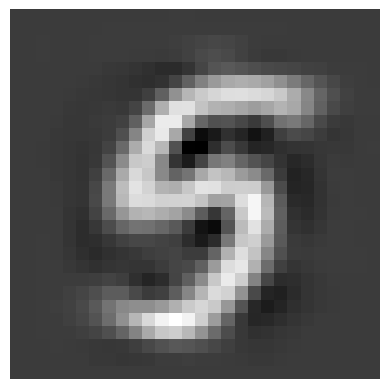

In [ ]:
# Reconstruct the chosen image

image_reconstructed = pca_model.inverse_transform(X_train_pca[image_index,:])
print(image_reconstructed.shape)

plt.imshow(image_reconstructed.reshape((28, 28)),cmap = 'gray')
plt.axis('off')

### **🟢 Beginner Explanation - Reconstructing an Image with PCA**

---

This code **reconstructs** an **image** that was **compressed** using **PCA** (Principal Component Analysis). It **transforms** the **PCA** representation **back** into its **original** form, making it **visible** again.

---

#### **🔷 Code Breakdown:**

1. **Reconstruct the Image:**

```python
image_reconstructed = pca_model.inverse_transform(X_train_pca[image_index,:])
print(image_reconstructed.shape)
```

* **`pca_model.inverse_transform()`** - **Reverses** the PCA **transformation** to **reconstruct** the original image.
* **`X_train_pca[image_index,:]`** - **Selects** the specific image you want to **reconstruct** (using **`image_index`**).
* **`print(image_reconstructed.shape)`** - **Prints** the shape of the **reconstructed** image to **verify** the **dimensions**.

---

2. **Visualize the Reconstructed Image:**

```python
plt.imshow(image_reconstructed.reshape((28, 28)), cmap='gray')
plt.axis('off')
```

* **`reshape((28, 28))`** - **Reshapes** the **flattened** image back into its **original** **28x28** format (like a **handwritten digit** from the **MNIST** dataset).
* **`cmap='gray'`** - **Displays** the image in **grayscale**.
* **`plt.axis('off')`** - **Removes** the **axis labels** for a **cleaner** view.

---

#### **🔷 What This Does:**

* **Compresses** the original **high-dimensional** image data into a **lower-dimensional** representation using **PCA**.
* **Reconstructs** the original image by **reversing** this compression, resulting in a **lower-quality** but still **recognizable** image.

---

### **🔷 Example Use Case:**

Imagine you have a **handwritten digit** (like the number **7**) that was **compressed** into **100** principal components. This code will **rebuild** the image using only those **100** components, which can **drastically** reduce the **size** while **preserving** the **essential** features.

---

Would you like a short **visual** on how this **reconstruction** affects the **quality** of the image? 😊


# Logistic regression on the PCA reduced dataset

In [11]:
lregmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lregmodel.fit(X_train_pca,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

Trains a logistic regression model on the PCA-reduced data.

Multinomial logistic regression is used for multi-class classification.

In [12]:
testindex = 0
print('True number: ',y_test[testindex])
prediction = lregmodel.predict(X_test_pca[testindex].reshape(1,-1))
print('Predicted number: ',prediction)

True number:  3
Predicted number:  [3]


Tests the logistic regression model on a single test sample.

Prints the true and predicted label.

In [13]:
# Evaluation of the classifier

y_predicted = lregmodel.predict(X_test_pca)

# Confusion matrix

print(confusion_matrix(y_test, y_predicted))

# Classification report

print(classification_report(y_test, y_predicted))

print(accuracy_score(y_test, y_predicted))

[[1150    0    5    5    0    9   10    2   13    1]
 [   0 1320    4    3    0    5    1    3   15    1]
 [  10   11 1014   12   18   11   24   15   36    6]
 [   6   10   32 1097    0   53    9   11   23   17]
 [   3    7   11    1 1030    2   18    0    9   59]
 [  15   15   12   39   14  898   24    5   39   15]
 [  15    3   11    0   17   14 1094    2   11    0]
 [   6    7   20    4   11    5    0 1164    3   48]
 [  11   36   12   29    6   45    8    6 1005   16]
 [   9    8    9   14   48   15    1   51   13 1045]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1195
           1       0.93      0.98      0.95      1352
           2       0.90      0.88      0.89      1157
           3       0.91      0.87      0.89      1258
           4       0.90      0.90      0.90      1140
           5       0.85      0.83      0.84      1076
           6       0.92      0.94      0.93      1167
           7       0.92      0.92   

Evaluates the model using a confusion matrix, classification report, and accuracy score.



# SVM on the PCA compressed dataset

In [14]:
SVMmodel = svm.SVC(C=1)

SVMmodel.fit(X_train_pca, y_train)

SVC(C=1)

In [15]:
# Evaluation of the SVM classifier

y_predicted_SVM = SVMmodel.predict(X_test_pca)
# Confusion matrix

print(confusion_matrix(y_test, y_predicted))

# Classification report

print(classification_report(y_test, y_predicted))

print(accuracy_score(y_test, y_predicted))

[[1150    0    5    5    0    9   10    2   13    1]
 [   0 1320    4    3    0    5    1    3   15    1]
 [  10   11 1014   12   18   11   24   15   36    6]
 [   6   10   32 1097    0   53    9   11   23   17]
 [   3    7   11    1 1030    2   18    0    9   59]
 [  15   15   12   39   14  898   24    5   39   15]
 [  15    3   11    0   17   14 1094    2   11    0]
 [   6    7   20    4   11    5    0 1164    3   48]
 [  11   36   12   29    6   45    8    6 1005   16]
 [   9    8    9   14   48   15    1   51   13 1045]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1195
           1       0.93      0.98      0.95      1352
           2       0.90      0.88      0.89      1157
           3       0.91      0.87      0.89      1258
           4       0.90      0.90      0.90      1140
           5       0.85      0.83      0.84      1076
           6       0.92      0.94      0.93      1167
           7       0.92      0.92   

In [16]:
print(confusion_matrix(y_test, y_predicted_SVM))
print(classification_report(y_test, y_predicted_SVM))
print(accuracy_score(y_test, y_predicted_SVM))

[[1189    0    0    0    0    0    4    0    2    0]
 [   0 1346    1    2    1    1    0    0    1    0]
 [   5    0 1136    2    2    0    2    6    3    1]
 [   1    1    7 1225    0    7    0    6    7    4]
 [   1    4    0    0 1112    0    4    1    1   17]
 [   2    2    0    8    2 1050    4    0    5    3]
 [   6    1    2    0    1    1 1156    0    0    0]
 [   1    4    4    1    3    0    0 1242    2   11]
 [   1    6    4    3    1    4    2    0 1151    2]
 [   6    4    4   10   11    2    0   15    5 1156]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1195
           1       0.98      1.00      0.99      1352
           2       0.98      0.98      0.98      1157
           3       0.98      0.97      0.98      1258
           4       0.98      0.98      0.98      1140
           5       0.99      0.98      0.98      1076
           6       0.99      0.99      0.99      1167
           7       0.98      0.98   

Trains an SVM model on the PCA-reduced data.

Evaluates the SVM model.

### **🟢 Beginner Explanation - Logistic Regression and SVM on PCA-Reduced Data**

---

This code **trains** and **evaluates** two **different** machine learning models (**Logistic Regression** and **Support Vector Machine**) on a **PCA-reduced** dataset, often used for **handwritten digit** classification like the **MNIST** dataset.

---

#### **🔷 1. Training Logistic Regression on PCA-Reduced Data**

```python
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
lregmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lregmodel.fit(X_train_pca, y_train)
```

* **`LogisticRegression()`** - Creates a **Logistic Regression** model.
* **`multi_class='multinomial'`** - **Specifies** that the model is for **multi-class** classification (more than two classes).
* **`solver='lbfgs'`** - **Optimization** algorithm that works well for **small** to **medium-sized** datasets.
* **`fit()`** - **Trains** the model using the **PCA-reduced** training data (**`X_train_pca`**) and **labels** (**`y_train`**).

---

#### **🔷 2. Testing the Model on a Single Sample**

```python
testindex = 0
print('True number: ', y_test[testindex])

# Make a prediction for a single test sample
prediction = lregmodel.predict(X_test_pca[testindex].reshape(1,-1))
print('Predicted number: ', prediction)
```

* **`y_test[testindex]`** - **Prints** the **actual** label of the **first** test image.
* **`predict()`** - **Predicts** the label of the **first** test image.
* **`reshape(1, -1)`** - **Reshapes** the single test sample to a **2D** array, as required by **scikit-learn**.

---

#### **🔷 3. Evaluating the Logistic Regression Model**

```python
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Make predictions on the entire test set
y_predicted = lregmodel.predict(X_test_pca)

# Print confusion matrix
print(confusion_matrix(y_test, y_predicted))

# Print classification report
print(classification_report(y_test, y_predicted))

# Print accuracy score
print(accuracy_score(y_test, y_predicted))
```

* **`confusion_matrix()`** - Shows how many times the model **correctly** or **incorrectly** predicted each class.
* **`classification_report()`** - **Detailed** performance report, including **precision**, **recall**, **F1-score**, and **support**.
* **`accuracy_score()`** - **Prints** the overall **accuracy** of the model.

---

#### **🔷 4. Training and Evaluating a Support Vector Machine (SVM)**

```python
from sklearn import svm

# Create and train an SVM model
SVMmodel = svm.SVC(C=1)
SVMmodel.fit(X_train_pca, y_train)

# Make predictions on the entire test set
y_predicted_SVM = SVMmodel.predict(X_test_pca)

# Print confusion matrix
print(confusion_matrix(y_test, y_predicted_SVM))

# Print classification report
print(classification_report(y_test, y_predicted_SVM))

# Print accuracy score
print(accuracy_score(y_test, y_predicted_SVM))
```

* **`SVMmodel = svm.SVC(C=1)`** - **Creates** an **SVM** model with a **regularization** parameter of **1**.
* **`fit()`** - **Trains** the SVM model.
* **`predict()`** - **Predicts** the classes for the **entire** test set.
* **`confusion_matrix()`**, **`classification_report()`**, and **`accuracy_score()`** - **Evaluate** the SVM model's **performance**.

---

#### **🔷 Key Differences Between the Models:**

* **Logistic Regression**:

  * **Faster** training.
  * Better for **simple** decision boundaries.
  * Handles **multi-class** classification well with **softmax**.

* **Support Vector Machine (SVM)**:

  * **Slower** but more **powerful**.
  * **Maximizes** the **margin** between classes.
  * Can handle **non-linear** relationships with **kernels**.

---

Would you like a quick overview of how these **metrics** are **calculated** and what they **mean**? 😊
